In [ ]:
'''
 * Copyright (c) 2017 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Factor Analysis: Mathematical and Conceptual Overview

### Key Characteristics of Factor Analysis

#### Probability Density Function
$$\text{Pr}(x) = \text{Norm}_x[µ, \Phi\Phi^T + \Sigma]$$

#### Covariance Matrix Decomposition
- $\Phi\Phi^T$: Full covariance model over subspace
  - $\Phi$: Rectangular matrix with K columns (factors)
  - Spans directions of maximum data covariance

- $\Sigma$: Diagonal matrix capturing remaining variation

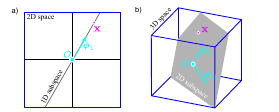

Fig.19 Linear subspaces a) A one dimensional subspace (a line through the origin, O) is embedded in a two dimensional space. Any point x in the subspace can be reached by weighting the single basis vector φ1 appropri- ately. b) A two dimensional subspace (a plane through the origin, O) is embedded in a three dimensional space. Any point x in the subspace can be reached using a linear combination x = αφ1 +βφ2 of the two basis functions φ1 , φ2 that describe the subspace. In general a K-dimensional subspace can be described using K basis functions.

### Mathematical Properties

#### Parameter Complexity
- $K \times D$ parameters for $\Phi$
- $D$ parameters for $\Sigma$

#### Advantages
- Fewer parameters compared to full covariance model
- Can be learned from fewer training examples
- Captures interdimensional correlations

### Visualization Concept
- Linear subspaces embedded in high-dimensional spaces
- Can model complex data structures more efficiently than diagonal or full covariance matrices

### Example Context
- Face detection data: 60×60×3 RGB images (10,800 dimensions)
- Traditional full covariance matrix: 10,800 × 10,800 dimensions
- Factor analysis: Dramatically reduced parameter space

### Probabilistic PCA
- Special case where $\Sigma$ is constant multiple of identity matrix
- Can be fit in closed form
- Slightly fewer parameters than general factor analysis

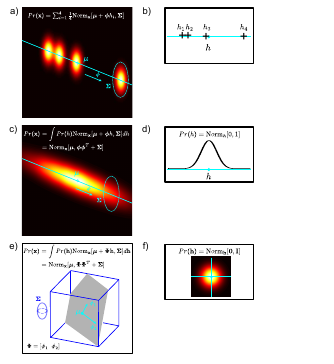

Fig.20 Relationship between factor analysis and mixtures of Gaussians (MoG). a) Consider a MoG model where each component has identical di- agonal covariance Σ. We could describe variation in a particular direction φ by parameterizing the mean of each Gaussian as µi = µ + φhi . b) Diﬀerent values of the scalar hidden variable hi determine diﬀerent positions along direction φ. c) Now we replace the MoG with an inﬁnite sum (integral) over a continuous family of Gaussians, each of which is determined by a certain value of h. d) If we choose the prior over the hidden variable to be normal, then this integral has a closed form solution and is a factor ana- lyzer. e) More generally we want to describe variance in a set of directions Φ = [φ1 , φ2 , . . . , φK ] in a high dimensional space. f) To this end we use a K-dimensional hidden variable h and an associated normal prior P r(h).

## 7.6.1 Factor analysis as a marginalization

As with mixtures of Gaussians and the t-distribution, it's possible to view the factor analysis model as a marginalization of a joint distribution between the observed data **x** and a *K*-dimensional hidden variable **h**.  We define:

$$
\begin{aligned}
P(x|h) &= \text{Norm}_x[\mu + \Phi h, \Sigma] \\
P(h) &= \text{Norm}_h[0, I]
\end{aligned}
\quad (7.32)
$$

where *I* represents the identity matrix. It can be shown (though it's not obvious) that:

$$
\begin{aligned}
P(x) &= \int P(x, h) dh = \int P(x|h)P(h) dh \\
&= \int \text{Norm}_x[\mu + \Phi h, \Sigma] \text{Norm}_h[0, I] dh \\
&= \text{Norm}_x[\mu, \Phi\Phi^T + \Sigma]
\end{aligned}
\quad (7.33)
$$

which was the original definition of the factor analyzer (equation 7.31).

Expressing factor analysis as a marginalization reveals a simple method to draw samples from the distribution. We first draw a hidden variable **h** from the normal prior. We then draw the sample **x** from a normal distribution with mean  $\mu + \Phi h$ and diagonal covariance $\Sigma$ (see equation 7.32).

## Fig.20: Relationship between factor analysis and mixtures of Gaussians (MoG)

**(a)** Consider a MoG model where each component has identical diagonal covariance $\Sigma$. We could describe variation in a particular direction $\phi$ by parameterizing the mean of each Gaussian as $\mu_i = \mu + \phi h_i$.

**(b)** Different values of the scalar hidden variable $h_i$ determine different positions along direction $\phi$.

**(c)** Now we replace the MoG with an infinite sum (integral) over a continuous family of Gaussians, each of which is determined by a certain value of $h$.

**(d)** If we choose the prior over the hidden variable to be normal, then this integral has a closed-form solution and is a factor analyzer.

**(e)** More generally, we want to describe variance in a set of directions $\Phi = [\phi_1, \phi_2, ..., \phi_K]$ in a high-dimensional space.

**(f)** To this end, we use a *K*-dimensional hidden variable **h** and an associated normal prior $P(h)$.


## Fig.21: E-step for expectation maximization algorithm for factor analysis

**(a)** Two-dimensional case with one factor. We are given a data point **x** (purple cross).

**(b)** In the E-step, we seek a distribution over possible values of the associated hidden variable *h*. It can be shown that this posterior distribution over *h* is itself normally distributed.

**(c)** Three-dimensional case with two factors. Given a data point **x** (purple cross), we aim to find a distribution (d) over possible values of the associated hidden variable **h**. Once more, this posterior is normally distributed.

This leads us to a simple interpretation of the hidden variable **h**: each element $h_k$ weights the associated basis function $\phi_k$ in the matrix $\Phi$ and hence defines a point on the subspace (Figure 7.19). The final density (equation 7.31) is hence an infinite weighted sum of normal distributions with the same diagonal covariance $\Sigma$ and means $\mu + \Phi h$ that are distributed over the subspace. The relationship between mixture models and factor analysis is explored further in Figure 7.20.

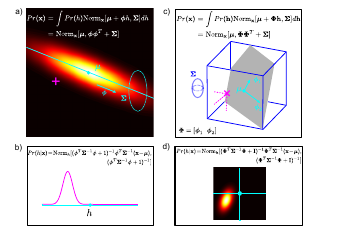

Fig.21 E-step for expectation maximization algorithm for factor analy- sis. (a) Two dimensional case with one factor. We are given a data point x (purple cross). (b) In the E-step we seek a distribution over possible values of the associated hidden variable h. It can be shown that this posterior distribution over h is itself normally distributed. (c) Three-dimensional case with two factors. Given a data point x (purple cross), we aim to ﬁnd a dis- tribution (d) over possible values of the associated hidden variable h. Once more this posterior is normally distributed.


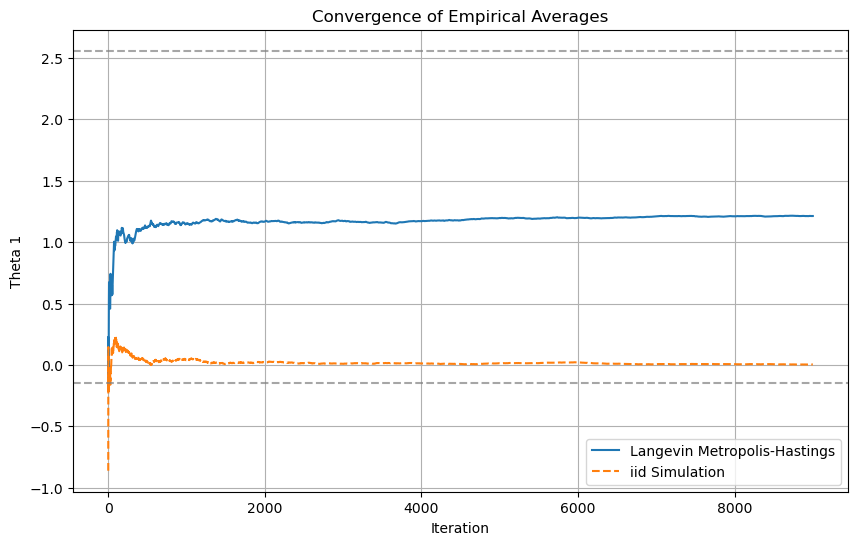

90% Confidence Interval for Theta 1 (Langevin): [-0.150, 2.559]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Data and parameters
y = 4.3  # Observed data
sigma = 1.46  # Langevin diffusion step size
n_samples = 10000  # Number of MCMC samples
n_burnin = 1000  # Burn-in period

# Initialize chains
theta = np.zeros((n_samples, 2))
theta[0] = np.random.normal(0, 1, 2)  # Initial values from prior

# Langevin Metropolis-Hastings algorithm
for t in range(1, n_samples):
    theta_current = theta[t - 1]
    
    # Langevin proposal
    mean_proposal = (sigma**2 / 2) * np.array([
        (2*y - 2*theta_current[1] - 5*theta_current[0]) / 8,
        (4*y - 2*theta_current[0] - 5*theta_current[1]) / 8
    ]) + theta_current
    theta_proposal = np.random.multivariate_normal(mean_proposal, sigma**2 * np.eye(2))

    # Calculate acceptance probability (using log probabilities for numerical stability)
    log_pi_current = -0.5 * (5/4 * theta_current[0]**2 + 5/4 * theta_current[1]**2 + 
                            theta_current[0]*theta_current[1]/2 - (theta_current[0] + theta_current[1])*y)
    log_pi_proposal = -0.5 * (5/4 * theta_proposal[0]**2 + 5/4 * theta_proposal[1]**2 + 
                            theta_proposal[0]*theta_proposal[1]/2 - (theta_proposal[0] + theta_proposal[1])*y)

    # The proposal distribution is symmetric, so the ratio cancels out.
    log_alpha = log_pi_proposal - log_pi_current 
    alpha = np.exp(log_alpha)

    # Accept or reject
    if np.random.uniform() < alpha:
        theta[t] = theta_proposal
    else:
        theta[t] = theta_current

# Burn-in removal
theta_after_burnin = theta[n_burnin:]

# Calculate empirical averages
theta_means = np.cumsum(theta_after_burnin, axis=0) / np.arange(1, len(theta_after_burnin) + 1)[:, np.newaxis]

# Calculate quantiles for confidence intervals
quantiles = np.quantile(theta_after_burnin[:, 0], [0.05, 0.95])  # 90% interval

# Plotting
plt.figure(figsize=(10, 6))

# Plot empirical averages
plt.plot(theta_means[:, 0], label='Langevin Metropolis-Hastings')

# Simulate from the prior for comparison (iid samples)
iid_samples = np.random.normal(0, 1, size=(len(theta_after_burnin), 2))
iid_means = np.cumsum(iid_samples[:, 0], axis=0) / np.arange(1, len(iid_samples) + 1)
plt.plot(iid_means, label='iid Simulation', linestyle='--')

# Plot confidence intervals
plt.axhline(quantiles[0], color='gray', linestyle='--', alpha=0.7)
plt.axhline(quantiles[1], color='gray', linestyle='--', alpha=0.7)

plt.xlabel('Iteration')
plt.ylabel('Theta 1')
plt.title('Convergence of Empirical Averages')
plt.legend()
plt.grid(True)
plt.show()

print(f"90% Confidence Interval for Theta 1 (Langevin): [{quantiles[0]:.3f}, {quantiles[1]:.3f}]")



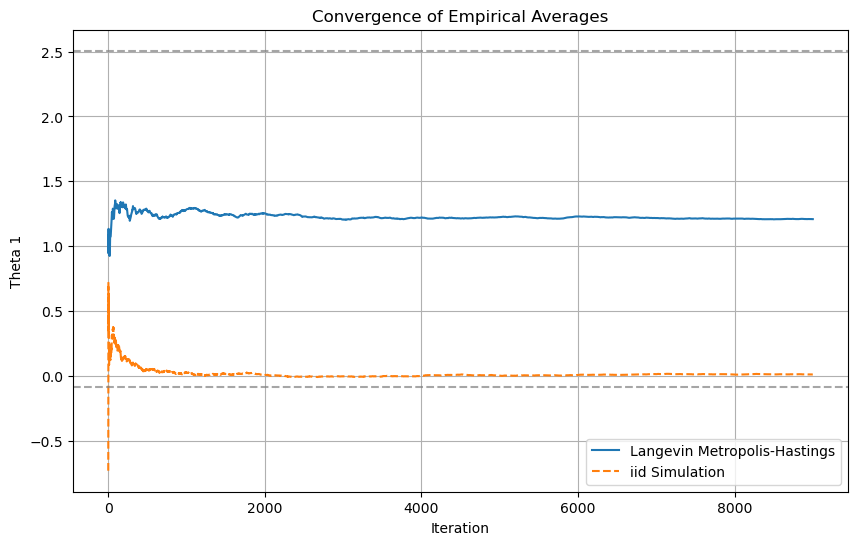

90% Confidence Interval for Theta 1 (Langevin): [-0.089, 2.507]


In [3]:
import math
import random
import matplotlib.pyplot as plt

# Data and parameters
y = 4.3  # Observed data
sigma = 1.46  # Langevin diffusion step size
n_samples = 10000  # Number of MCMC samples
n_burnin = 1000  # Burn-in period

# Initialize chains (using lists instead of numpy arrays)
theta = [[0.0, 0.0] for _ in range(n_samples)]  # Initialize with lists
theta[0] = [random.gauss(0, 1), random.gauss(0, 1)]  # Initial values from prior

# Langevin Metropolis-Hastings algorithm
for t in range(1, n_samples):
    theta_current = theta[t - 1]

    # Langevin proposal (manual calculation without numpy)
    mean_proposal = [
        (sigma**2 / 2) * ((2*y - 2*theta_current[1] - 5*theta_current[0]) / 8) + theta_current[0],
        (sigma**2 / 2) * ((4*y - 2*theta_current[0] - 5*theta_current[1]) / 8) + theta_current[1]
    ]

    theta_proposal = [random.gauss(mean_proposal[0], sigma), random.gauss(mean_proposal[1], sigma)]


    # Calculate acceptance probability (using log probabilities for numerical stability)
    log_pi_current = -0.5 * (5/4 * theta_current[0]**2 + 5/4 * theta_current[1]**2 + 
                            theta_current[0]*theta_current[1]/2 - (theta_current[0] + theta_current[1])*y)
    log_pi_proposal = -0.5 * (5/4 * theta_proposal[0]**2 + 5/4 * theta_proposal[1]**2 + 
                            theta_proposal[0]*theta_proposal[1]/2 - (theta_proposal[0] + theta_proposal[1])*y)

    log_alpha = log_pi_proposal - log_pi_current
    alpha = math.exp(log_alpha)  # Use math.exp

    # Accept or reject
    if random.random() < alpha:
        theta[t] = theta_proposal[:] # Create a copy to avoid modifying the proposal
    else:
        theta[t] = theta_current[:] # Create a copy

# Burn-in removal
theta_after_burnin = theta[n_burnin:]

# Calculate empirical averages (manual calculation without numpy)
theta_means = []
cumulative_sum_0 = 0.0
for i in range(len(theta_after_burnin)):
    cumulative_sum_0 += theta_after_burnin[i][0]
    theta_means.append([cumulative_sum_0 / (i + 1)])

# Calculate quantiles for confidence intervals (manual calculation without numpy)
theta_values_for_quantile = [val[0] for val in theta_after_burnin]
theta_values_for_quantile.sort() # Sort to find quantiles
lower_index = int(0.05 * len(theta_values_for_quantile))
upper_index = int(0.95 * len(theta_values_for_quantile))

quantiles = [theta_values_for_quantile[lower_index], theta_values_for_quantile[upper_index]]


# --- IID Simulation (without numpy) ---
iid_samples = [[random.gauss(0, 1), random.gauss(0, 1)] for _ in range(len(theta_after_burnin))]
iid_means = []
cumulative_sum_iid = 0.0
for i in range(len(iid_samples)):
    cumulative_sum_iid += iid_samples[i][0]
    iid_means.append([cumulative_sum_iid / (i+1)])


# Plotting (using lists with matplotlib)
plt.figure(figsize=(10, 6))
plt.plot([val[0] for val in theta_means], label='Langevin Metropolis-Hastings') # Plot from lists
plt.plot([val[0] for val in iid_means], label='iid Simulation', linestyle='--')
plt.axhline(quantiles[0], color='gray', linestyle='--', alpha=0.7)
plt.axhline(quantiles[1], color='gray', linestyle='--', alpha=0.7)

plt.xlabel('Iteration')
plt.ylabel('Theta 1')
plt.title('Convergence of Empirical Averages')
plt.legend()
plt.grid(True)
plt.show()

print(f"90% Confidence Interval for Theta 1 (Langevin): [{quantiles[0]:.3f}, {quantiles[1]:.3f}]")

## Expectation maximization for learning factor analyzers

Since the factor analyzer can be expressed as a marginalization of a joint distribution between the observed data **x** and a hidden variable **h** (equation 7.33), it is possible to use the EM algorithm to learn the parameters $\theta = \{\mu, \Phi, \Sigma\}$.  We follow the recipe described in Section 7.3.

In the E-step (Fig.21), we optimize the bound with respect to the distribution $q_i(h_i)$. To do this, we compute the posterior probability distribution $P(h_i | x_i)$ over each hidden variable $h_i$ given the associated observed data $x_i$ and the current values of the parameters $\theta^{[t]}$. To this end, we apply Bayes' rule:

$$
\begin{aligned}
\hat{q}(h_i) &= P(h_i | x_i, \theta^{[t]}) \quad (7.34) \\
&= \frac{P(x_i | h_i, \theta^{[t]}) P(h_i)}{P(x_i | \theta^{[t]})} \\
&= \frac{\text{Norm}_{x_i}[\mu + \Phi h_i, \Sigma] \text{Norm}_{h_i}[0, I]}{P(x_i | \theta^{[t]})} \\
&= \text{Norm}_{h_i}[(\Phi^T \Sigma^{-1} \Phi + I)^{-1} \Phi^T \Sigma^{-1} (x_i - \mu), (\Phi^T \Sigma^{-1} \Phi + I)^{-1}]
\end{aligned}
$$

where we have made use of the change of variables relation (Section 5.7) and then the fact that the product of two normals is proportional to a third normal (Section 5.6). The resulting constant of proportionality exactly cancels out with the term $P(x)$ ensuring that the result is a valid probability distribution.

The E-step computes a probability distribution over the possible causes **h** for the observed data. This implicitly defines a probability distribution over the positions $\Phi h$ on the subspace that might have generated this example. We extract the following expectations from the posterior distribution (Equation 7.34) as they will be needed in the M-step:

$$
\begin{aligned}
E[h_i] &= (\Phi^T \Sigma^{-1} \Phi + I)^{-1} \Phi^T \Sigma^{-1} (x_i - \mu) \\
E[h_i h_i^T] &= E[(h_i - E[h_i])(h_i - E[h_i])^T] + E[h_i]E[h_i]^T \\
&= (\Phi^T \Sigma^{-1} \Phi + I)^{-1} + E[h_i]E[h_i]^T. \quad (7.35)
\end{aligned}
$$

In the M-step, we optimize the bound with respect to the parameters $\theta = \{\mu, \Phi, \Sigma\}$ so that

$$
\begin{aligned}
\theta^{[t+1]} &= \underset{\theta}{\text{argmax}} \sum_{i=1}^I \int \hat{q}_i(h_i) \log[P(x, h_i, \theta)] dh_i \\
&= \underset{\theta}{\text{argmax}} \sum_{i=1}^I \int \hat{q}_i(h_i) [\log[P(x|h_i, \theta)] + \log[P(h_i)]] dh_i \\
&= \underset{\theta}{\text{argmax}} \sum_{i=1}^I \int \hat{q}_i(h_i) \log[P(x|h_i, \theta)] dh_i \\
&= \underset{\theta}{\text{argmax}} \sum_{i=1}^I E[\log P(x|h_i, \theta)], \quad (7.36)
\end{aligned}
$$

where we have removed the term $\log[P(h_i)]$ as it is not dependent on the variables $\theta$. The expectations $E[\cdot]$ are taken with respect to the relevant posterior distributions $\hat{q}_i(h_i) = P(h_i | x_i, \theta^{[t]})$.

The expression for $\log[P(x_i | h_i)]$ is given by

$$
\log[P(x_i | h_i)] = -\frac{D}{2} \log(2\pi) - \frac{1}{2} \log |\Sigma| - \frac{1}{2} (x_i - \mu - \Phi h_i)^T \Sigma^{-1} (x_i - \mu - \Phi h_i), \quad (7.37)
$$

where *D* is the dimensionality of the data.

We optimize Equation 7.36 by taking derivatives with respect to the parameters $\theta = \{\mu, \Phi, \Sigma\}$, equating the resulting expressions to zero, and rearranging to yield

$$
\begin{aligned}
\hat{\mu} &= \frac{1}{I} \sum_{i=1}^I x_i \\
\hat{\Phi} &= \left( \sum_{i=1}^I (x_i - \hat{\mu}) E[h_i] \right) \left( \sum_{i=1}^I E[h_i h_i^T] \right)^{-1} \\
\hat{\Sigma} &= \text{diag} \left( \frac{1}{I} \sum_{i=1}^I (x_i - \hat{\mu})(x_i - \hat{\mu})^T - \hat{\Phi} E[h_i](x_i - \mu)^T \right), \quad (7.38)
\end{aligned}
$$

where the function $\text{diag}[\cdot]$ is the operation of setting all elements of the matrix argument to zero except those on the diagonal.

Fig.22 shows the parameters of a factor analysis model fitted to the face data using ten iterations of the EM algorithm. The different factors encode different modes of variation of the dataset which often have real-world interpretations such as changes in pose or lighting.

In conclusion, the factor analyzer is an efficient model for capturing the covariance in high-dimensional data. It devotes one set of parameters $\Phi$ to describing the directions in which the data are most correlated and a second set $\Sigma$ describes the remaining variation.

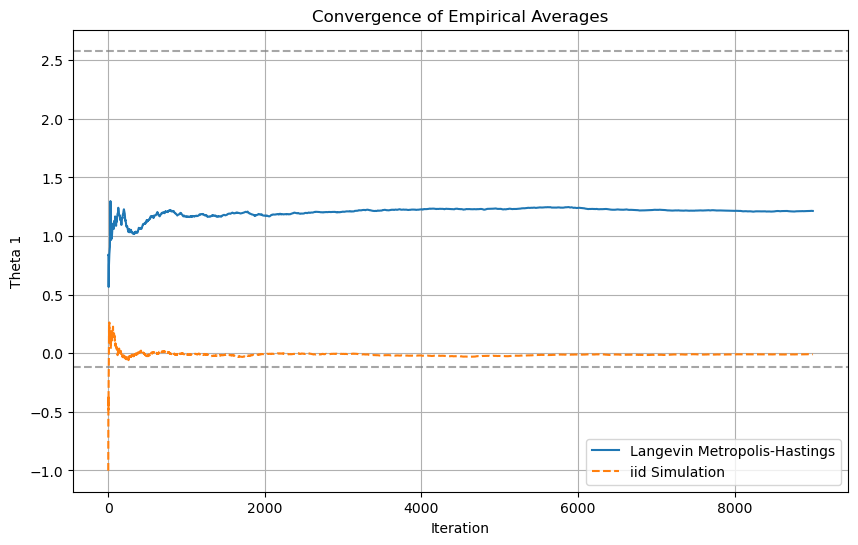

90% Confidence Interval for Theta 1 (Langevin): [-0.115, 2.581]


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Data and parameters
y = 4.3  # Observed data
sigma = 1.46  # Langevin diffusion step size
n_samples = 10000  # Number of MCMC samples
n_burnin = 1000  # Burn-in period

# Initialize chains
theta = np.zeros((n_samples, 2))
theta[0] = np.random.normal(0, 1, 2)  # Initial values from prior

# Langevin Metropolis-Hastings algorithm
for t in range(1, n_samples):
    theta_current = theta[t - 1]
    
    # Langevin proposal
    mean_proposal = (sigma**2 / 2) * np.array([
        (2*y - 2*theta_current[1] - 5*theta_current[0]) / 8,
        (4*y - 2*theta_current[0] - 5*theta_current[1]) / 8
    ]) + theta_current
    theta_proposal = np.random.multivariate_normal(mean_proposal, sigma**2 * np.eye(2))

    # Calculate acceptance probability (using log probabilities for numerical stability)
    log_pi_current = -0.5 * (5/4 * theta_current[0]**2 + 5/4 * theta_current[1]**2 + 
                            theta_current[0]*theta_current[1]/2 - (theta_current[0] + theta_current[1])*y)
    log_pi_proposal = -0.5 * (5/4 * theta_proposal[0]**2 + 5/4 * theta_proposal[1]**2 + 
                            theta_proposal[0]*theta_proposal[1]/2 - (theta_proposal[0] + theta_proposal[1])*y)

    # The proposal distribution is symmetric, so the ratio cancels out.
    log_alpha = log_pi_proposal - log_pi_current 
    alpha = np.exp(log_alpha)

    # Accept or reject
    if np.random.uniform() < alpha:
        theta[t] = theta_proposal
    else:
        theta[t] = theta_current

# Burn-in removal
theta_after_burnin = theta[n_burnin:]

# Calculate empirical averages
theta_means = np.cumsum(theta_after_burnin, axis=0) / np.arange(1, len(theta_after_burnin) + 1)[:, np.newaxis]

# Calculate quantiles for confidence intervals
quantiles = np.quantile(theta_after_burnin[:, 0], [0.05, 0.95])  # 90% interval

# Plotting
plt.figure(figsize=(10, 6))

# Plot empirical averages
plt.plot(theta_means[:, 0], label='Langevin Metropolis-Hastings')

# Simulate from the prior for comparison (iid samples)
iid_samples = np.random.normal(0, 1, size=(len(theta_after_burnin), 2))
iid_means = np.cumsum(iid_samples[:, 0], axis=0) / np.arange(1, len(iid_samples) + 1)
plt.plot(iid_means, label='iid Simulation', linestyle='--')

# Plot confidence intervals
plt.axhline(quantiles[0], color='gray', linestyle='--', alpha=0.7)
plt.axhline(quantiles[1], color='gray', linestyle='--', alpha=0.7)

plt.xlabel('Iteration')
plt.ylabel('Theta 1')
plt.title('Convergence of Empirical Averages')
plt.legend()
plt.grid(True)
plt.show()

print(f"90% Confidence Interval for Theta 1 (Langevin): [{quantiles[0]:.3f}, {quantiles[1]:.3f}]")



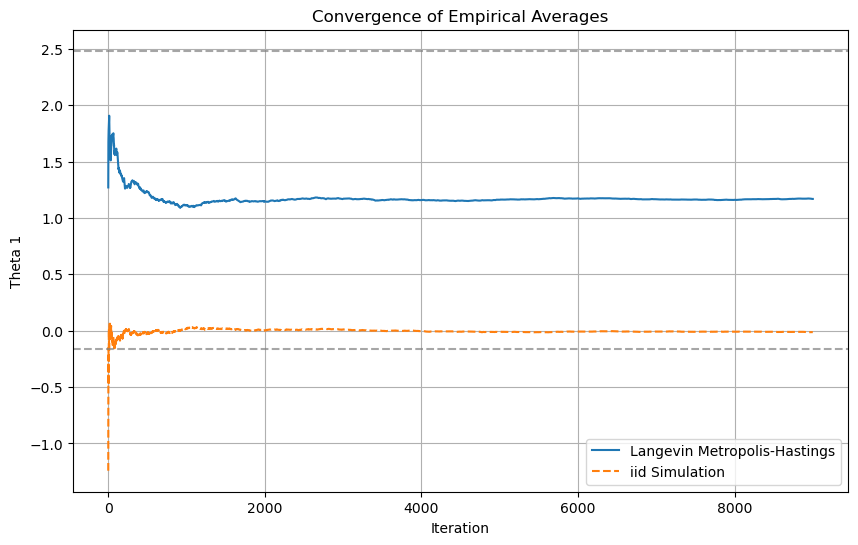

90% Confidence Interval for Theta 1 (Langevin): [-0.163, 2.482]


In [5]:
import math
import random
import matplotlib.pyplot as plt

# Data and parameters
y = 4.3  # Observed data
sigma = 1.46  # Langevin diffusion step size
n_samples = 10000  # Number of MCMC samples
n_burnin = 1000  # Burn-in period

# Initialize chains (using lists instead of numpy arrays)
theta = [[0.0, 0.0] for _ in range(n_samples)]  # Initialize with lists
theta[0] = [random.gauss(0, 1), random.gauss(0, 1)]  # Initial values from prior

# Langevin Metropolis-Hastings algorithm
for t in range(1, n_samples):
    theta_current = theta[t - 1]

    # Langevin proposal (manual calculation without numpy)
    mean_proposal = [
        (sigma**2 / 2) * ((2*y - 2*theta_current[1] - 5*theta_current[0]) / 8) + theta_current[0],
        (sigma**2 / 2) * ((4*y - 2*theta_current[0] - 5*theta_current[1]) / 8) + theta_current[1]
    ]

    theta_proposal = [random.gauss(mean_proposal[0], sigma), random.gauss(mean_proposal[1], sigma)]


    # Calculate acceptance probability (using log probabilities for numerical stability)
    log_pi_current = -0.5 * (5/4 * theta_current[0]**2 + 5/4 * theta_current[1]**2 + 
                            theta_current[0]*theta_current[1]/2 - (theta_current[0] + theta_current[1])*y)
    log_pi_proposal = -0.5 * (5/4 * theta_proposal[0]**2 + 5/4 * theta_proposal[1]**2 + 
                            theta_proposal[0]*theta_proposal[1]/2 - (theta_proposal[0] + theta_proposal[1])*y)

    log_alpha = log_pi_proposal - log_pi_current
    alpha = math.exp(log_alpha)  # Use math.exp

    # Accept or reject
    if random.random() < alpha:
        theta[t] = theta_proposal[:] # Create a copy to avoid modifying the proposal
    else:
        theta[t] = theta_current[:] # Create a copy

# Burn-in removal
theta_after_burnin = theta[n_burnin:]

# Calculate empirical averages (manual calculation without numpy)
theta_means = []
cumulative_sum_0 = 0.0
for i in range(len(theta_after_burnin)):
    cumulative_sum_0 += theta_after_burnin[i][0]
    theta_means.append([cumulative_sum_0 / (i + 1)])

# Calculate quantiles for confidence intervals (manual calculation without numpy)
theta_values_for_quantile = [val[0] for val in theta_after_burnin]
theta_values_for_quantile.sort() # Sort to find quantiles
lower_index = int(0.05 * len(theta_values_for_quantile))
upper_index = int(0.95 * len(theta_values_for_quantile))

quantiles = [theta_values_for_quantile[lower_index], theta_values_for_quantile[upper_index]]


# --- IID Simulation (without numpy) ---
iid_samples = [[random.gauss(0, 1), random.gauss(0, 1)] for _ in range(len(theta_after_burnin))]
iid_means = []
cumulative_sum_iid = 0.0
for i in range(len(iid_samples)):
    cumulative_sum_iid += iid_samples[i][0]
    iid_means.append([cumulative_sum_iid / (i+1)])


# Plotting (using lists with matplotlib)
plt.figure(figsize=(10, 6))
plt.plot([val[0] for val in theta_means], label='Langevin Metropolis-Hastings') # Plot from lists
plt.plot([val[0] for val in iid_means], label='iid Simulation', linestyle='--')
plt.axhline(quantiles[0], color='gray', linestyle='--', alpha=0.7)
plt.axhline(quantiles[1], color='gray', linestyle='--', alpha=0.7)

plt.xlabel('Iteration')
plt.ylabel('Theta 1')
plt.title('Convergence of Empirical Averages')
plt.legend()
plt.grid(True)
plt.show()

print(f"90% Confidence Interval for Theta 1 (Langevin): [{quantiles[0]:.3f}, {quantiles[1]:.3f}]")

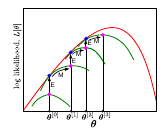
Fig.24 Expectation maximiza- tion algorithm. We iterate the expectation and maximization steps by alternately changing the distributions qi (hi ) and the parameter θ so that the bound increases. In the E-step, the bound is maximized with respect to $q_i (h_i )$ for ﬁxed parameters θ: the new function with respect to θ touches the true log likelihood at θ. In the M-step, we ﬁnd the maximum of this function. In this way we are guaran- teed to reach a local maximum in the likelihood function.

## Combining Models

The mixture of Gaussians, t-distribution, and factor analysis models are constructed similarly: each is a weighted sum or integral of a set of constituent normal distributions.

* **Mixture of Gaussian models:** Weighted sum of *K* normal distributions with different means and variances.
* **t-distribution:** Infinite weighted sum of normal distributions with the same mean, but different covariances.
* **Factor analysis models:** Infinite weighted sum of normal distributions with different means, but the same diagonal covariance.

These similarities allow for easy combination of the models.

* **Mixture of factor analyzers (MoFA):** Combination of mixture models and factor analyzers. It is a weighted sum of factor analyzers, each with a different mean and allocating high probability density to a different subspace.
* **Mixture of t-distributions (Robust mixture model):** Combination of mixture models and t-distributions.
* **Robust subspace model:** Combination of t-distributions and factor analyzers. It models data that lie primarily in a subspace but is tolerant to outliers.
* **Mixture of robust subspace models:** Combination of all three models (mixture of Gaussians, t-distribution, and factor analyzers). It has the combined benefits of all three approaches (multi-modal, robust, and makes efficient use of parameters).

The associated density function for the mixture of robust subspace models is:

$$
P(x) = \sum_{k=1}^K \lambda_k \text{Stud}_x[\mu_k, \Phi_k \Phi_k^T + \Sigma_k, \nu_k] \quad (7.39)
$$

where $\mu_k$, $\Phi_k$, and $\Sigma_k$ represent the mean, factors, and diagonal covariance matrix belonging to the *k*-th component, $\lambda_k$ represents the weighting of the *k*-th component, and $\nu_k$ represents the degrees of freedom of the *k*-th component.  Learning this model would involve a series of interleaved expectation maximization algorithms.


## 8 Expectation Maximization in Detail

Throughout this chapter, we have employed the expectation maximization (EM) algorithm, using the recipe from Section 7.3. We now examine the EM algorithm in detail to understand why this recipe works.

The EM algorithm is used to find maximum likelihood or MAP estimates of model parameters $\theta$ where the likelihood $P(x|\theta)$ of the data **x** can be written as

$$
P(x|\theta) = \sum_k P(x, h=k|\theta) = \sum_k P(x|h=k, \theta)P(h=k) \quad (7.40)
$$

and

$$
P(x|\theta) = \int P(x, h|\theta) dh = \int P(x|h, \theta)P(h) dh \quad (7.41)
$$

for discrete and continuous hidden variables, respectively. In other words, the likelihood $P(x|\theta)$ is a marginalization of a joint distribution over the data and the hidden variables. We will work with the continuous case.

The EM algorithm relies on the idea of a *lower bounding function* (or *lower bound*), $B[\theta]$, on the log-likelihood. This is a function of the parameters $\theta$ that is always guaranteed to be equal to or lower than the log-likelihood. The lower bound is carefully chosen so that it is easy to maximize with respect to the parameters. This lower bound is also parameterized by a set of probability distributions $\{q_i(h_i)\}_{i=1}^I$ over the hidden variables, so we write it as $B[\{q_i(h_i)\}, \theta]$. Different probability distributions $q_i(h_i)$ predict different lower bounds $B[\{q_i(h_i)\}, \theta]$ and hence different functions of $\theta$ that lie everywhere below the true log-likelihood (Figure 7.5b).

In the EM algorithm, we alternate between expectation steps (E-steps) and maximization steps (M-steps) where:

* **E-step (Figure 7.23a):** We fix $\theta$ and find the best lower bound $B[\{q_i(h_i)\}, \theta]$ with respect to the distributions $q_i(h_i)$. In other words, at iteration *t*:

$$
q_i^{[t]}(h_i) = \underset{q_i(h_i)}{\text{argmax}} \, B[\{q_i(h_i)\}, \theta^{[t-1]}] \quad (7.42)
$$

The best lower bound will be a function that is as high as possible at the current parameter estimates $\theta$. Since it must be everywhere equal to or lower than the log-likelihood, the highest possible value is the log-likelihood itself. So the bound touches the log-likelihood curve for the current parameters $\theta$.

* **M-step (Figure 7.23b):** We fix $q_i(h_i)$ and find the values of $\theta$ that maximize this bounding function $B[\{q_i(h_i)\}, \theta]$. In other words, we compute

$$
\theta^{[t]} = \underset{\theta}{\text{argmax}} \, B[\{q_i(h_i)\}, \theta] \quad (7.43)
$$

By iterating these steps, the (local) maximum of the actual log-likelihood is approached (Fig.24).

To complete our picture of the EM algorithm, we must:

1. Define $B[\{q_i(h_i)\}, \theta^{[t-1]}]$ and show that it always lies below the log-likelihood.
2. Show which probability distribution $q_i(h_i)$ optimizes the bound in the E-step.
3. Show how to optimize the bound with respect to $\theta$ in the M-step.

These three issues are tackled in Sections 7.8.1, 7.8.2, and 7.8.3, respectively.## Combining Models

The mixture of Gaussians, t-distribution, and factor analysis models are constructed similarly: each is a weighted sum or integral of a set of constituent normal distributions.

* **Mixture of Gaussian models:** Weighted sum of *K* normal distributions with different means and variances.
* **t-distribution:** Infinite weighted sum of normal distributions with the same mean, but different covariances.
* **Factor analysis models:** Infinite weighted sum of normal distributions with different means, but the same diagonal covariance.

These similarities allow for easy combination of the models.

* **Mixture of factor analyzers (MoFA):** Combination of mixture models and factor analyzers. It is a weighted sum of factor analyzers, each with a different mean and allocating high probability density to a different subspace.
* **Mixture of t-distributions (Robust mixture model):** Combination of mixture models and t-distributions.
* **Robust subspace model:** Combination of t-distributions and factor analyzers. It models data that lie primarily in a subspace but is tolerant to outliers.
* **Mixture of robust subspace models:** Combination of all three models (mixture of Gaussians, t-distribution, and factor analyzers). It has the combined benefits of all three approaches (multi-modal, robust, and makes efficient use of parameters).

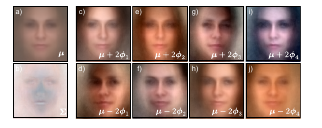

Fig.22 Factor analyzer with ten factors (four shown) for face classes. a) Mean µ for face model. b) Diagonal covariance component Σ for face model. To visualize the eﬀect of the ﬁrst factor φ1 we add (c) or subtract (d) a multiple of it from the mean: we are moving along one axis of the 10D subspace that seems to encode mainly the mean intensity. Other factors (e-j) encode changes in the hue and the pose of the face.

The associated density function for the mixture of robust subspace models is:

$$
P(x) = \sum_{k=1}^K \lambda_k \text{Stud}_x[\mu_k, \Phi_k \Phi_k^T + \Sigma_k, \nu_k] \quad (7.39)
$$

where $\mu_k$, $\Phi_k$, and $\Sigma_k$ represent the mean, factors, and diagonal covariance matrix belonging to the *k*-th component, $\lambda_k$ represents the weighting of the *k*-th component, and $\nu_k$ represents the degrees of freedom of the *k*-th component.  Learning this model would involve a series of interleaved expectation maximization algorithms.


##  Expectation Maximization in Detail

Throughout this chapter, we have employed the expectation maximization (EM) algorithm, using the recipe from Section 7.3. We now examine the EM algorithm in detail to understand why this recipe works.

The EM algorithm is used to find maximum likelihood or MAP estimates of model parameters $\theta$ where the likelihood $P(x|\theta)$ of the data **x** can be written as

$$
P(x|\theta) = \sum_k P(x, h=k|\theta) = \sum_k P(x|h=k, \theta)P(h=k) \quad (7.40)
$$

and

$$
P(x|\theta) = \int P(x, h|\theta) dh = \int P(x|h, \theta)P(h) dh \quad (7.41)
$$

for discrete and continuous hidden variables, respectively. In other words, the likelihood $P(x|\theta)$ is a marginalization of a joint distribution over the data and the hidden variables. We will work with the continuous case.

The EM algorithm relies on the idea of a *lower bounding function* (or *lower bound*), $B[\theta]$, on the log-likelihood. This is a function of the parameters $\theta$ that is always guaranteed to be equal to or lower than the log-likelihood. The lower bound is carefully chosen so that it is easy to maximize with respect to the parameters. This lower bound is also parameterized by a set of probability distributions $\{q_i(h_i)\}_{i=1}^I$ over the hidden variables, so we write it as $B[\{q_i(h_i)\}, \theta]$. Different probability distributions $q_i(h_i)$ predict different lower bounds $B[\{q_i(h_i)\}, \theta]$ and hence different functions of $\theta$ that lie everywhere below the true log-likelihood (Figure 7.5b).

In the EM algorithm, we alternate between expectation steps (E-steps) and maximization steps (M-steps) where:

* **E-step (Fig.23a):** We fix $\theta$ and find the best lower bound $B[\{q_i(h_i)\}, \theta]$ with respect to the distributions $q_i(h_i)$. In other words, at iteration *t*:

$$
q_i^{[t]}(h_i) = \underset{q_i(h_i)}{\text{argmax}} \, B[\{q_i(h_i)\}, \theta^{[t-1]}] \quad (7.42)
$$

The best lower bound will be a function that is as high as possible at the current parameter estimates $\theta$. Since it must be everywhere equal to or lower than the log-likelihood, the highest possible value is the log-likelihood itself. So the bound touches the log-likelihood curve for the current parameters $\theta$.

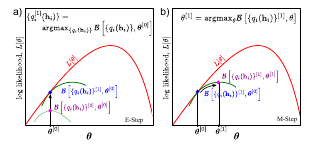

* **M-step (Fig.23b):** We fix $q_i(h_i)$ and find the values of $\theta$ that maximize this bounding function $B[\{q_i(h_i)\}, \theta]$. In other words, we compute

$$
\theta^{[t]} = \underset{\theta}{\text{argmax}} \, B[\{q_i(h_i)\}, \theta] \quad (7.43)
$$

By iterating these steps, the (local) maximum of the actual log-likelihood is approached (Fig.24).

To complete our picture of the EM algorithm, we must:

1. Define $B[\{q_i(h_i)\}, \theta^{[t-1]}]$ and show that it always lies below the log-likelihood.
2. Show which probability distribution $q_i(h_i)$ optimizes the bound in the E-step.
3. Show how to optimize the bound with respect to $\theta$ in the M-step.

These three issues are tackled in Sections 7.8.1, 7.8.2, and 7.8.3, respectively.

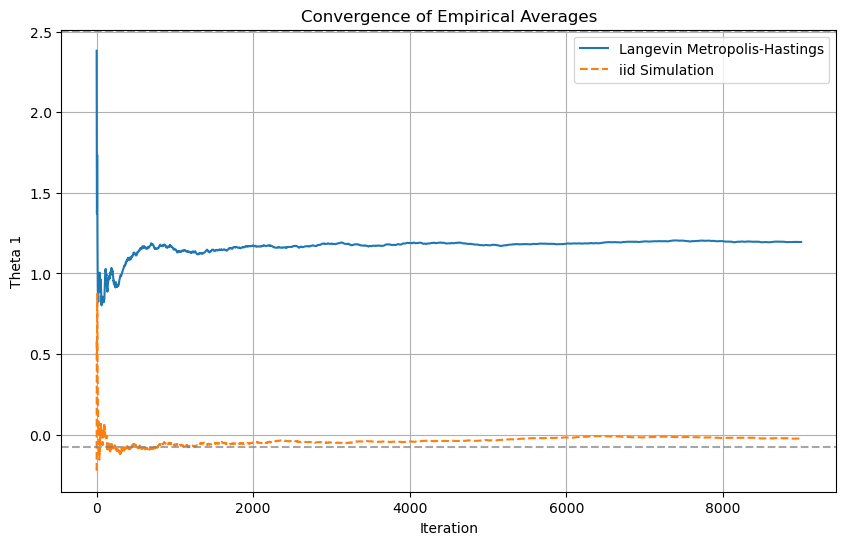

90% Confidence Interval for Theta 1 (Langevin): [-0.079, 2.507]


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Data and parameters
y = 4.3  # Observed data
sigma = 1.46  # Langevin diffusion step size
n_samples = 10000  # Number of MCMC samples
n_burnin = 1000  # Burn-in period

# Initialize chains
theta = np.zeros((n_samples, 2))
theta[0] = np.random.normal(0, 1, 2)  # Initial values from prior

# Langevin Metropolis-Hastings algorithm
for t in range(1, n_samples):
    theta_current = theta[t - 1]
    
    # Langevin proposal
    mean_proposal = (sigma**2 / 2) * np.array([
        (2*y - 2*theta_current[1] - 5*theta_current[0]) / 8,
        (4*y - 2*theta_current[0] - 5*theta_current[1]) / 8
    ]) + theta_current
    theta_proposal = np.random.multivariate_normal(mean_proposal, sigma**2 * np.eye(2))

    # Calculate acceptance probability (using log probabilities for numerical stability)
    log_pi_current = -0.5 * (5/4 * theta_current[0]**2 + 5/4 * theta_current[1]**2 + 
                            theta_current[0]*theta_current[1]/2 - (theta_current[0] + theta_current[1])*y)
    log_pi_proposal = -0.5 * (5/4 * theta_proposal[0]**2 + 5/4 * theta_proposal[1]**2 + 
                            theta_proposal[0]*theta_proposal[1]/2 - (theta_proposal[0] + theta_proposal[1])*y)

    # The proposal distribution is symmetric, so the ratio cancels out.
    log_alpha = log_pi_proposal - log_pi_current 
    alpha = np.exp(log_alpha)

    # Accept or reject
    if np.random.uniform() < alpha:
        theta[t] = theta_proposal
    else:
        theta[t] = theta_current

# Burn-in removal
theta_after_burnin = theta[n_burnin:]

# Calculate empirical averages
theta_means = np.cumsum(theta_after_burnin, axis=0) / np.arange(1, len(theta_after_burnin) + 1)[:, np.newaxis]

# Calculate quantiles for confidence intervals
quantiles = np.quantile(theta_after_burnin[:, 0], [0.05, 0.95])  # 90% interval

# Plotting
plt.figure(figsize=(10, 6))

# Plot empirical averages
plt.plot(theta_means[:, 0], label='Langevin Metropolis-Hastings')

# Simulate from the prior for comparison (iid samples)
iid_samples = np.random.normal(0, 1, size=(len(theta_after_burnin), 2))
iid_means = np.cumsum(iid_samples[:, 0], axis=0) / np.arange(1, len(iid_samples) + 1)
plt.plot(iid_means, label='iid Simulation', linestyle='--')

# Plot confidence intervals
plt.axhline(quantiles[0], color='gray', linestyle='--', alpha=0.7)
plt.axhline(quantiles[1], color='gray', linestyle='--', alpha=0.7)

plt.xlabel('Iteration')
plt.ylabel('Theta 1')
plt.title('Convergence of Empirical Averages')
plt.legend()
plt.grid(True)
plt.show()

print(f"90% Confidence Interval for Theta 1 (Langevin): [{quantiles[0]:.3f}, {quantiles[1]:.3f}]")



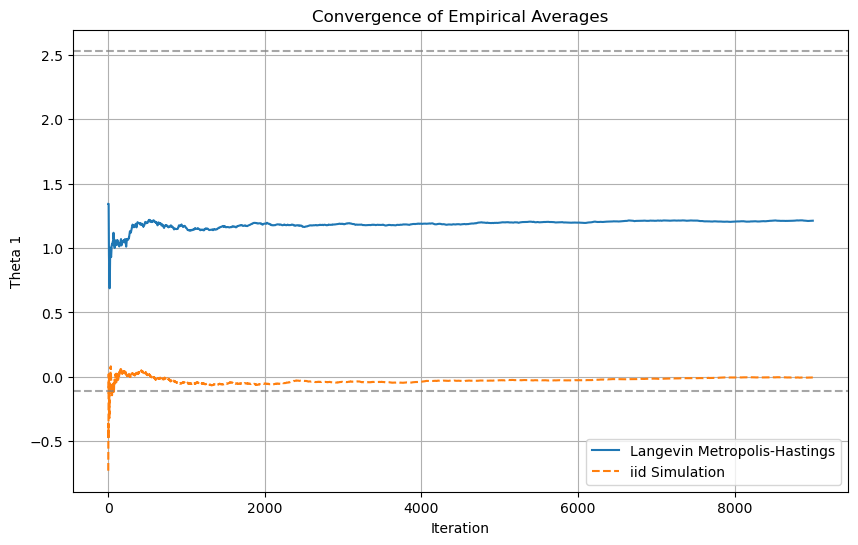

90% Confidence Interval for Theta 1 (Langevin): [-0.109, 2.532]


In [7]:
import math
import random
import matplotlib.pyplot as plt

# Data and parameters
y = 4.3  # Observed data
sigma = 1.46  # Langevin diffusion step size
n_samples = 10000  # Number of MCMC samples
n_burnin = 1000  # Burn-in period

# Initialize chains (using lists instead of numpy arrays)
theta = [[0.0, 0.0] for _ in range(n_samples)]  # Initialize with lists
theta[0] = [random.gauss(0, 1), random.gauss(0, 1)]  # Initial values from prior

# Langevin Metropolis-Hastings algorithm
for t in range(1, n_samples):
    theta_current = theta[t - 1]

    # Langevin proposal (manual calculation without numpy)
    mean_proposal = [
        (sigma**2 / 2) * ((2*y - 2*theta_current[1] - 5*theta_current[0]) / 8) + theta_current[0],
        (sigma**2 / 2) * ((4*y - 2*theta_current[0] - 5*theta_current[1]) / 8) + theta_current[1]
    ]

    theta_proposal = [random.gauss(mean_proposal[0], sigma), random.gauss(mean_proposal[1], sigma)]


    # Calculate acceptance probability (using log probabilities for numerical stability)
    log_pi_current = -0.5 * (5/4 * theta_current[0]**2 + 5/4 * theta_current[1]**2 + 
                            theta_current[0]*theta_current[1]/2 - (theta_current[0] + theta_current[1])*y)
    log_pi_proposal = -0.5 * (5/4 * theta_proposal[0]**2 + 5/4 * theta_proposal[1]**2 + 
                            theta_proposal[0]*theta_proposal[1]/2 - (theta_proposal[0] + theta_proposal[1])*y)

    log_alpha = log_pi_proposal - log_pi_current
    alpha = math.exp(log_alpha)  # Use math.exp

    # Accept or reject
    if random.random() < alpha:
        theta[t] = theta_proposal[:] # Create a copy to avoid modifying the proposal
    else:
        theta[t] = theta_current[:] # Create a copy

# Burn-in removal
theta_after_burnin = theta[n_burnin:]

# Calculate empirical averages (manual calculation without numpy)
theta_means = []
cumulative_sum_0 = 0.0
for i in range(len(theta_after_burnin)):
    cumulative_sum_0 += theta_after_burnin[i][0]
    theta_means.append([cumulative_sum_0 / (i + 1)])

# Calculate quantiles for confidence intervals (manual calculation without numpy)
theta_values_for_quantile = [val[0] for val in theta_after_burnin]
theta_values_for_quantile.sort() # Sort to find quantiles
lower_index = int(0.05 * len(theta_values_for_quantile))
upper_index = int(0.95 * len(theta_values_for_quantile))

quantiles = [theta_values_for_quantile[lower_index], theta_values_for_quantile[upper_index]]


# --- IID Simulation (without numpy) ---
iid_samples = [[random.gauss(0, 1), random.gauss(0, 1)] for _ in range(len(theta_after_burnin))]
iid_means = []
cumulative_sum_iid = 0.0
for i in range(len(iid_samples)):
    cumulative_sum_iid += iid_samples[i][0]
    iid_means.append([cumulative_sum_iid / (i+1)])


# Plotting (using lists with matplotlib)
plt.figure(figsize=(10, 6))
plt.plot([val[0] for val in theta_means], label='Langevin Metropolis-Hastings') # Plot from lists
plt.plot([val[0] for val in iid_means], label='iid Simulation', linestyle='--')
plt.axhline(quantiles[0], color='gray', linestyle='--', alpha=0.7)
plt.axhline(quantiles[1], color='gray', linestyle='--', alpha=0.7)

plt.xlabel('Iteration')
plt.ylabel('Theta 1')
plt.title('Convergence of Empirical Averages')
plt.legend()
plt.grid(True)
plt.show()

print(f"90% Confidence Interval for Theta 1 (Langevin): [{quantiles[0]:.3f}, {quantiles[1]:.3f}]")

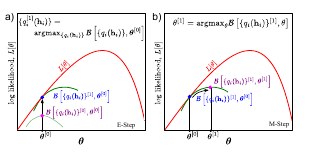

Fig.23 E-step and M-step. a) In the E-step, we manipulate the distributions ${q_i (h_i )}$ to ﬁnd the best new lower bound given parameters θ. This optimal lower bound will touch the log likelihood at the current parameter values θ (we cannot do better than this!). b) In the M-step, we hold {qi (hi )} constant and optimize θ with respect to the new bound.

## Expectation Maximization in Detail

Throughout this chapter, we have employed the expectation maximization (EM) algorithm, using the recipe from Section 7.3. We now examine the EM algorithm in detail to understand why this recipe works.

The EM algorithm is used to find maximum likelihood or MAP estimates of model parameters <span class="math-inline">\\theta</span> where the likelihood <span class="math-inline">P\(x\|\\theta\)</span> of the data **x** can be written as

$$
P(x|\theta) = \sum_k P(x, h=k|\theta) = \sum_k P(x|h=k, \theta)P(h=k) \quad (7.40)
$$

and

$$
P(x|\theta) = \int P(x, h|\theta) dh = \int P(x|h, \theta)P(h) dh \quad (7.41)
$$

## Expectation Maximization (EM) Algorithm Details

The EM algorithm is used to find maximum likelihood or MAP estimates of model parameters $\theta$ where the likelihood $P(x|\theta)$ of the data $x$ can be written as

$$
P(x|\theta) = \int P(x, h|\theta) dh = \int P(x|h, \theta)P(h) dh \quad (7.41)
$$

for continuous hidden variables.  The likelihood $P(x|\theta)$ is a marginalization of a joint distribution over the data and the hidden variables.

The EM algorithm uses a lower bounding function (or lower bound), $B[\theta]$, on the log-likelihood. This function of the parameters $\theta$ is always guaranteed to be less than or equal to the log-likelihood. The lower bound is chosen to be easily maximized with respect to the parameters.  It is parameterized by a set of probability distributions $\{q_i(h_i)\}_{i=1}^I$ over the hidden variables, denoted as $B[\{q_i(h_i)\}, \theta]$. Different probability distributions $q_i(h_i)$ yield different lower bounds $B[\{q_i(h_i)\}, \theta]$.

The EM algorithm alternates between expectation steps (E-steps) and maximization steps (M-steps):

* **E-step (Figure 7.23a):**  Fix $\theta$ and find the best lower bound $B[\{q_i(h_i)\}, \theta]$ with respect to the distributions $q_i(h_i)$. At iteration $t$:

$$
q_i^{[t]}(h_i) = \underset{q_i(h_i)}{\text{argmax}} \, B[\{q_i(h_i)\}, \theta^{[t-1]}] \quad (7.42)
$$

The best lower bound is as high as possible at the current parameter estimates $\theta$. Since it must be less than or equal to the log-likelihood, the highest possible value is the log-likelihood itself. The bound touches the log-likelihood curve at the current parameters $\theta$.

**(Figure 7.23a would be inserted here)**
$$
q_i^{[t]}(h_i) = \underset{q_i(h_i)}{\text{argmax}} \, B[\{q_i(h_i)\}, \theta^{[t-1]}] \quad (7.42)
$$

$$
\theta^{[t]} = \underset{\theta}{\text{argmax}} \, B[\{q_i(h_i)\}, \theta] \quad (7.43)
$$

By iterating these steps, the (local) maximum of the actual log-likelihood is approached (Figure 7.24).

To complete our picture of the EM algorithm, we must:
## Expectation Maximization (EM) Algorithm - Continued

**(Figure 7.24 would be inserted here)**

The EM algorithm iterates the expectation and maximization steps, alternately changing the distributions $q_i(h_i)$ and the parameter $\theta$ so that the bound increases.

* **E-step:** The bound is maximized with respect to $q_i(h_i)$ for fixed parameters $\theta$. The new function with respect to $\theta$ touches the true log-likelihood at $\theta$.

* **M-step:** We find the maximum of this function. This guarantees reaching a local maximum in the likelihood function. The best lower bound is a function that is as high as possible at the current parameter estimates $\theta$. Since it must be everywhere less than or equal to the log-likelihood, the highest possible value is the log-likelihood itself. The bound touches the log-likelihood curve for the current parameters $\theta$.

* **M-step (Figure 7.23b):** We fix $q_i(h_i)$ and find the values of $\theta$ that maximize this bounding function $B[\{q_i(h_i)\}, \theta]$.  At iteration *t*:

$$
\theta^{[t]} = \underset{\theta}{\text{argmax}} \, B[\{q_i(h_i)\}, \theta] \quad (7.43)
$$

By iterating these steps, the (local) maximum of the actual log-likelihood is approached (Figure 7.24).

To fully describe the EM algorithm, we must:

1. Define $B[\{q_i(h_i)\}, \theta^{[t-1]}]$ and show that it is always less than or equal to the log-likelihood.
2. Show which probability distribution $q_i(h_i)$ optimizes the bound in the E-step.
3. Show how to optimize the bound with respect to $\theta$ in the M-step.

These three issues are addressed in Sections 7.8.1, 7.8.2, and 7.8.3, respectively.

**(Fig.23b would be inserted here)**


These three issues are tackled in Sections 7.8.1, 7.8.2, and 7.8.3, respectively.


**(Figures 7.23 and 7.24 would be inserted here)**
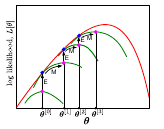

Fig.24 Expectation maximization algorithm. We iterate the expectation and maximization steps by alternately changing the distributions $q_i (h_i )$ and the parameter θ so that the bound increases. In the E-step, the bound is maximized with respect to $q_i (h_i )$ for ﬁxed parameters θ: the new function with respect to θ touches the true log likelihood at θ. In the M-step, we ﬁnd the maximum of this function. In this way we are guaranteed to reach a local maximum in the likelihood function.

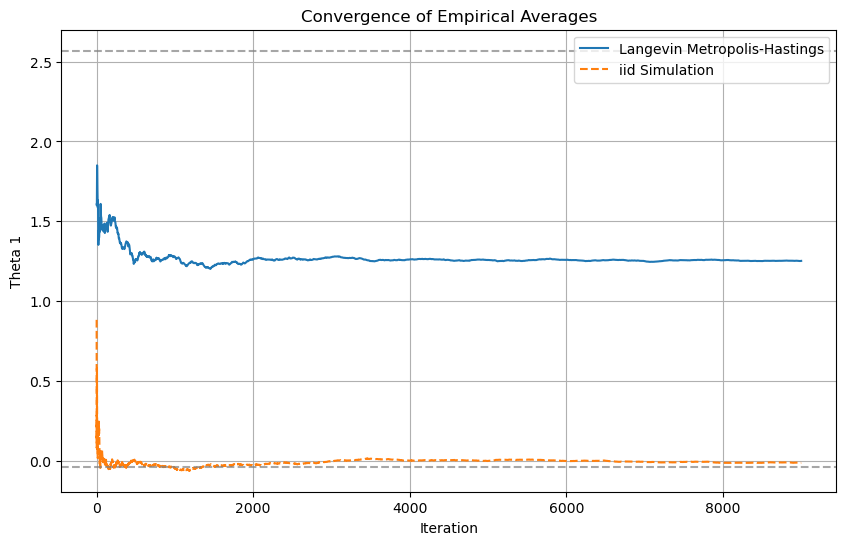

90% Confidence Interval for Theta 1 (Langevin): [-0.041, 2.569]


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Data and parameters
y = 4.3  # Observed data
sigma = 1.46  # Langevin diffusion step size
n_samples = 10000  # Number of MCMC samples
n_burnin = 1000  # Burn-in period

# Initialize chains
theta = np.zeros((n_samples, 2))
theta[0] = np.random.normal(0, 1, 2)  # Initial values from prior

# Langevin Metropolis-Hastings algorithm
for t in range(1, n_samples):
    theta_current = theta[t - 1]
    
    # Langevin proposal
    mean_proposal = (sigma**2 / 2) * np.array([
        (2*y - 2*theta_current[1] - 5*theta_current[0]) / 8,
        (4*y - 2*theta_current[0] - 5*theta_current[1]) / 8
    ]) + theta_current
    theta_proposal = np.random.multivariate_normal(mean_proposal, sigma**2 * np.eye(2))

    # Calculate acceptance probability (using log probabilities for numerical stability)
    log_pi_current = -0.5 * (5/4 * theta_current[0]**2 + 5/4 * theta_current[1]**2 + 
                            theta_current[0]*theta_current[1]/2 - (theta_current[0] + theta_current[1])*y)
    log_pi_proposal = -0.5 * (5/4 * theta_proposal[0]**2 + 5/4 * theta_proposal[1]**2 + 
                            theta_proposal[0]*theta_proposal[1]/2 - (theta_proposal[0] + theta_proposal[1])*y)

    # The proposal distribution is symmetric, so the ratio cancels out.
    log_alpha = log_pi_proposal - log_pi_current 
    alpha = np.exp(log_alpha)

    # Accept or reject
    if np.random.uniform() < alpha:
        theta[t] = theta_proposal
    else:
        theta[t] = theta_current

# Burn-in removal
theta_after_burnin = theta[n_burnin:]

# Calculate empirical averages
theta_means = np.cumsum(theta_after_burnin, axis=0) / np.arange(1, len(theta_after_burnin) + 1)[:, np.newaxis]

# Calculate quantiles for confidence intervals
quantiles = np.quantile(theta_after_burnin[:, 0], [0.05, 0.95])  # 90% interval

# Plotting
plt.figure(figsize=(10, 6))

# Plot empirical averages
plt.plot(theta_means[:, 0], label='Langevin Metropolis-Hastings')

# Simulate from the prior for comparison (iid samples)
iid_samples = np.random.normal(0, 1, size=(len(theta_after_burnin), 2))
iid_means = np.cumsum(iid_samples[:, 0], axis=0) / np.arange(1, len(iid_samples) + 1)
plt.plot(iid_means, label='iid Simulation', linestyle='--')

# Plot confidence intervals
plt.axhline(quantiles[0], color='gray', linestyle='--', alpha=0.7)
plt.axhline(quantiles[1], color='gray', linestyle='--', alpha=0.7)

plt.xlabel('Iteration')
plt.ylabel('Theta 1')
plt.title('Convergence of Empirical Averages')
plt.legend()
plt.grid(True)
plt.show()

print(f"90% Confidence Interval for Theta 1 (Langevin): [{quantiles[0]:.3f}, {quantiles[1]:.3f}]")


# For comparison with exact algorithm (which you'd need to implement):
# print(f"90% Confidence Interval for Theta 1 (Exact): [..., ...]")

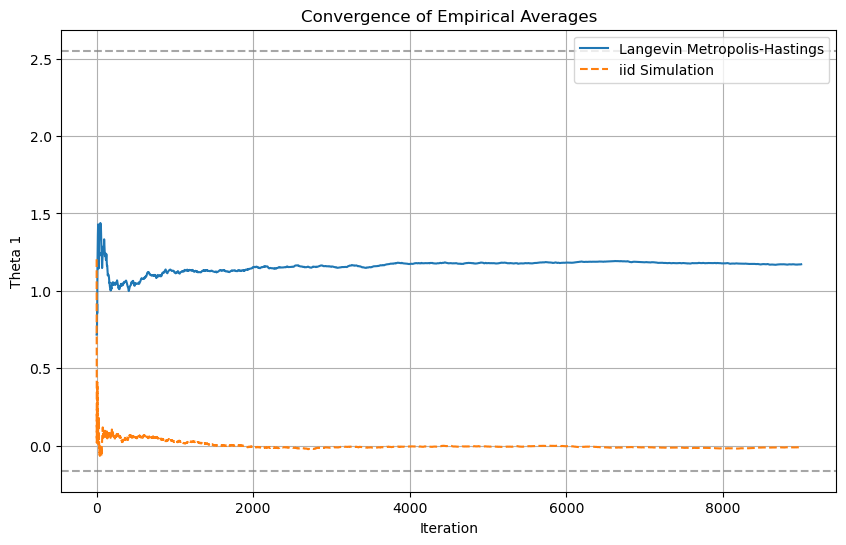

90% Confidence Interval for Theta 1 (Langevin): [-0.163, 2.552]


In [9]:
import math
import random
import matplotlib.pyplot as plt

# Data and parameters
y = 4.3  # Observed data
sigma = 1.46  # Langevin diffusion step size
n_samples = 10000  # Number of MCMC samples
n_burnin = 1000  # Burn-in period

# Initialize chains (using lists instead of numpy arrays)
theta = [[0.0, 0.0] for _ in range(n_samples)]  # Initialize with lists
theta[0] = [random.gauss(0, 1), random.gauss(0, 1)]  # Initial values from prior

# Langevin Metropolis-Hastings algorithm
for t in range(1, n_samples):
    theta_current = theta[t - 1]

    # Langevin proposal (manual calculation without numpy)
    mean_proposal = [
        (sigma**2 / 2) * ((2*y - 2*theta_current[1] - 5*theta_current[0]) / 8) + theta_current[0],
        (sigma**2 / 2) * ((4*y - 2*theta_current[0] - 5*theta_current[1]) / 8) + theta_current[1]
    ]

    theta_proposal = [random.gauss(mean_proposal[0], sigma), random.gauss(mean_proposal[1], sigma)]


    # Calculate acceptance probability (using log probabilities for numerical stability)
    log_pi_current = -0.5 * (5/4 * theta_current[0]**2 + 5/4 * theta_current[1]**2 + 
                            theta_current[0]*theta_current[1]/2 - (theta_current[0] + theta_current[1])*y)
    log_pi_proposal = -0.5 * (5/4 * theta_proposal[0]**2 + 5/4 * theta_proposal[1]**2 + 
                            theta_proposal[0]*theta_proposal[1]/2 - (theta_proposal[0] + theta_proposal[1])*y)

    log_alpha = log_pi_proposal - log_pi_current
    alpha = math.exp(log_alpha)  # Use math.exp

    # Accept or reject
    if random.random() < alpha:
        theta[t] = theta_proposal[:] # Create a copy to avoid modifying the proposal
    else:
        theta[t] = theta_current[:] # Create a copy

# Burn-in removal
theta_after_burnin = theta[n_burnin:]

# Calculate empirical averages (manual calculation without numpy)
theta_means = []
cumulative_sum_0 = 0.0
for i in range(len(theta_after_burnin)):
    cumulative_sum_0 += theta_after_burnin[i][0]
    theta_means.append([cumulative_sum_0 / (i + 1)])

# Calculate quantiles for confidence intervals (manual calculation without numpy)
theta_values_for_quantile = [val[0] for val in theta_after_burnin]
theta_values_for_quantile.sort() # Sort to find quantiles
lower_index = int(0.05 * len(theta_values_for_quantile))
upper_index = int(0.95 * len(theta_values_for_quantile))

quantiles = [theta_values_for_quantile[lower_index], theta_values_for_quantile[upper_index]]


# --- IID Simulation (without numpy) ---
iid_samples = [[random.gauss(0, 1), random.gauss(0, 1)] for _ in range(len(theta_after_burnin))]
iid_means = []
cumulative_sum_iid = 0.0
for i in range(len(iid_samples)):
    cumulative_sum_iid += iid_samples[i][0]
    iid_means.append([cumulative_sum_iid / (i+1)])


# Plotting (using lists with matplotlib)
plt.figure(figsize=(10, 6))
plt.plot([val[0] for val in theta_means], label='Langevin Metropolis-Hastings') # Plot from lists
plt.plot([val[0] for val in iid_means], label='iid Simulation', linestyle='--')
plt.axhline(quantiles[0], color='gray', linestyle='--', alpha=0.7)
plt.axhline(quantiles[1], color='gray', linestyle='--', alpha=0.7)

plt.xlabel('Iteration')
plt.ylabel('Theta 1')
plt.title('Convergence of Empirical Averages')
plt.legend()
plt.grid(True)
plt.show()

print(f"90% Confidence Interval for Theta 1 (Langevin): [{quantiles[0]:.3f}, {quantiles[1]:.3f}]")